In [1]:
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd

def unPackDenFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=4)
    distance = y[:,0]
    gas_density  = y[:,1]

   
    return distance, gas_density

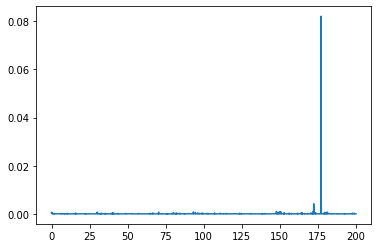

In [2]:
raw_path = 'los.00' + '{0:03}'.format(0) +'.den'
distance, gas_density = unPackDenFile(raw_path)
plt.plot(distance,gas_density)

In [3]:
len(gas_density)

10240

In [4]:
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

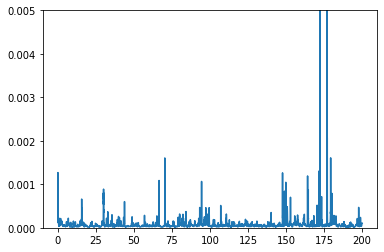

In [5]:
raw_path = 'los.00' + '{0:03}'.format(0) +'.raw'
distance1, pec_vel1, temp1, HI_density1, gas_density1, gas_metallicity1 = unPackRawFile(raw_path)
plt.ylim(0,0.005)
plt.plot(distance1,gas_density1)

In [6]:
gas_density1

array([0.0002315, 0.0002942, 0.0003524, ..., 0.000111 , 0.0001074,
       0.0001062])

In [7]:
len(HI_density1)

10651

In [8]:
#change shape

In [9]:
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

In [10]:
len(distance)

10240

In [11]:
new_distance = np.linspace(0,199.98047,10240)
new_y =sp.interpolate.interp1d(distance1,HI_density1, fill_value="extrapolate")(new_distance)

In [12]:
new_y

array([3.43762105e-08, 1.01128422e-07, 2.18098142e-07, ...,
       1.04347106e-08, 1.00188756e-08, 9.74312520e-09])

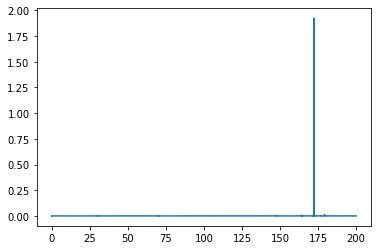

In [13]:
plt.plot(new_distance,new_y/gas_density)

In [14]:
def lyman_identification():
    """
    function for identifying lls using neutral fraction as filter
    """
    neutral_fraction_limit = 1e-3
    data = []
    for i in range(1000):
        temp_data = []
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        den_path =  'los.00' + '{0:03}'.format(i) +'.den'
        distance, pec_vel, temp, HI_density, gas_density2, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance1,gas_density1 = unPackDenFile(den_path)
        distance_cm = distance *0.1452*3.086e24 /0.68
        gas_density =sp.interpolate.interp1d(distance1,gas_density1, fill_value="extrapolate")(distance)
        for k in range(len(distance) -2):
            if(HI_density[k]/gas_density[k]<neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]>neutral_fraction_limit):
                left_bases = k+1
                peak_fraction = HI_density[k]/gas_density[k]
                peak_HI = HI_density[k]
                peak_distance = distance[k]
                if( k+1 <len(distance)):
                    while(not(HI_density[k]/gas_density[k]>neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]<neutral_fraction_limit) and k <len(distance)-2):
                        right_bases = k +1
                        if(k<len(distance)-1):
                            k+=1
                        if(HI_density[k]/gas_density[k]>peak_fraction):
                            peak_fraction = HI_density[k]/gas_density[k]
                            peak_HI = HI_density[k]
                            peak_distance = distance[k]
                    area_under = peak_HI *1/2*(distance_cm[right_bases]-distance_cm[left_bases])/0.937415
                    if(area_under >= (1.6*10**17)and area_under  <= (10**22)):
                        temp_data.append([area_under,distance[left_bases],distance[right_bases],peak_distance])
        data.append(temp_data)
    return data
lyman_limited_value = lyman_identification()


In [209]:
similar =[]
checkout =[]
for i in range(1000):
    for k in other_lls[i]:
        for z in lyman_limited_value[i]:
            if( z[3] == k[3] and z[1] <= k[1]+0.01 and z[1]>= k[1]-0.01 and  z[2]<= k[2]+0.01 and z[2]>= k[2]-0.01):
                if((z[0]-k[0])/z[0]>0.55):
                    checkout.append([i,k[1],k[2],k[3],z[1],z[2],z[3]])
                similar.append([k[0],z[0]])
#which los, left, right, middle original, left , right, middle new, difference

In [210]:
len(similar)

1136

In [211]:
checkout

[[354, 173.45306, 173.46718, 173.45724, 173.44403, 173.47567, 173.45724],
 [713, 50.2629, 50.27307, 50.26555, 50.25782, 50.28194, 50.26555]]

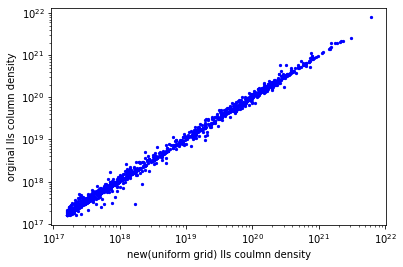

In [178]:
for i in similar:
    plt.scatter(i[0],i[1],c="blue",s = 5)
    plt.xscale('log')
    plt.yscale('log')
plt.ylabel("orginal lls column density",fontsize =10)
plt.xlabel("new(uniform grid) lls coulmn density",fontsize =10)
plt.savefig("a_figure.png",dpi=300)

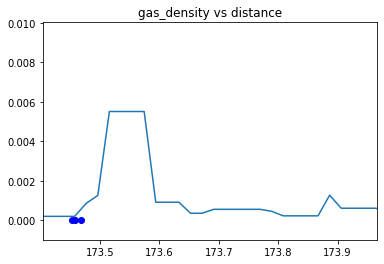

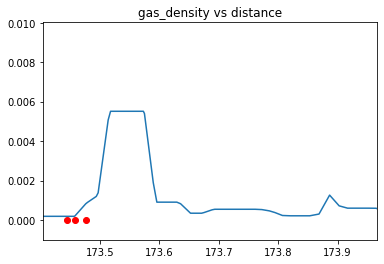

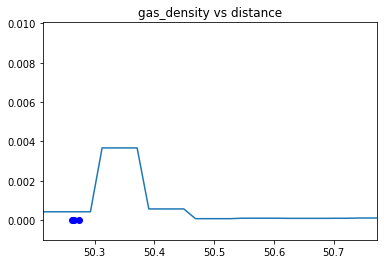

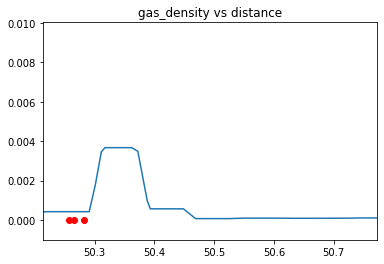

In [237]:
for i in checkout:
    raw_path = 'los.00' + '{0:03}'.format(i[0]) +'.raw'
    den_path =  'los.00' + '{0:03}'.format(i[0]) +'.den'
    distance, pec_vel1, temp1, HI_density1, gas_density1, gas_metallicity1 = unPackRawFile(raw_path)
    distance_cm = distance *0.1452*3.086e24 /0.68
    distance1, gas_density1 = unPackDenFile(den_path)
    gas_density =sp.interpolate.interp1d(distance1,gas_density1, fill_value="extrapolate")(distance)
    plt.plot(distance1,gas_density1)
    plt.scatter(i[1],0,c = "blue")
    plt.scatter(i[2],0,c = "blue")
    plt.scatter(i[3],0,c = "blue")
    plt.title("gas_density vs distance")
    plt.xlim(i[1]-.05,i[2]+.5)
    plt.ylim(-.001,gas_density1[int(i[2])]+0.01) 
    plt.savefig("a_figure1.png",dpi=300)
    plt.show()
   
    plt.plot(distance,gas_density)
    plt.scatter(i[4],0,c = "red")
    plt.scatter(i[5],0,c = "red")
    plt.scatter(i[6],0,c = "red")
    plt.xlim(i[1]-.05,i[2]+.5)
    plt.ylim(-.001,gas_density[int(i[5])]+0.01)
    plt.title("gas_density vs distance")
    plt.savefig("a_figure2.png",dpi=300)
    plt.show()
    

13842
13842


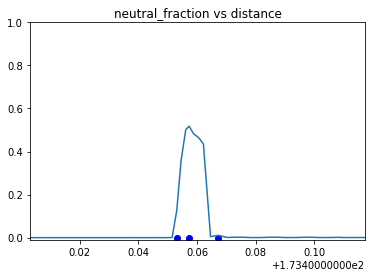

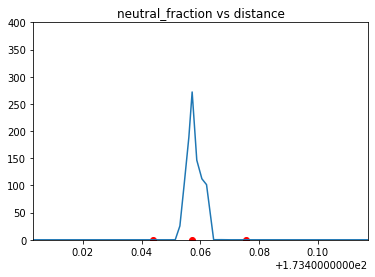

9198
9198


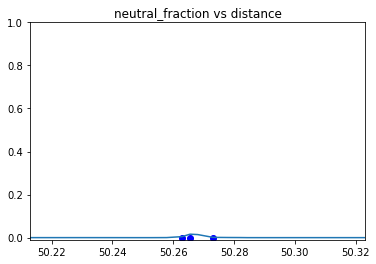

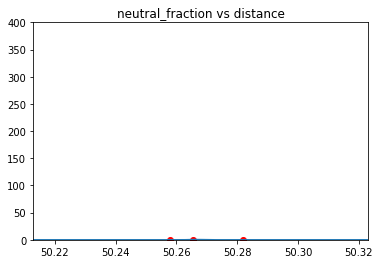

In [235]:
for i in checkout:
    raw_path = 'los.00' + '{0:03}'.format(i[0]) +'.raw'
    den_path =  'los.00' + '{0:03}'.format(i[0]) +'.den'
    distance, pec_vel, temp, HI_density, gas_density2, gas_metallicity = unPackRawFile(raw_path)
    print(len(HI_density))
    print(len( gas_density2))
        #changing the distance from chimp to cmeters
    distance1,gas_density1 = unPackDenFile(den_path)
    distance_cm = distance *0.1452*3.086e24 /0.68
    gas_density =sp.interpolate.interp1d(distance1,gas_density1, fill_value="extrapolate")(distance)
    plt.plot(distance, HI_density/gas_density2)
    plt.scatter(i[1],0,c = "blue")
    plt.scatter(i[2],0,c = "blue")
    plt.scatter(i[3],0,c = "blue")
    plt.xlim(i[1]-.05,i[2]+.05)
    plt.ylim(-.01,(HI_density/gas_density)[int(i[2])]+1) 
    plt.title("neutral_fraction vs distance")
    plt.show()
    plt.plot(distance, HI_density/gas_density)
    plt.scatter(i[4],0,c = "red")
    plt.scatter(i[5],0,c = "red")
    plt.scatter(i[6],0,c = "red")
    plt.xlim(i[1]-.05,i[2]+.05)
    plt.ylim(-.01,(HI_density/gas_density2)[int(i[5])]+400)
    plt.title("neutral_fraction vs distance")
    plt.show()

In [181]:
for i in checkout:
    raw_path = 'los.00' + '{0:03}'.format(i[0]) +'.raw'
    den_path =  'los.00' + '{0:03}'.format(i[0]) +'.den'
    distance, pec_vel, temp, HI_density, gas_density2, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
    distance1,gas_density1 = unPackDenFile(den_path)
    distance_cm = distance *0.1452*3.086e24 /0.68
    gas_density =sp.interpolate.interp1d(distance1,gas_density1, fill_value="extrapolate")(distance)
    for i in range(0,len(distance)):
        if(distance[i]>128.7):
            print(HI_density[i]/gas_density[i])
            print(distance[i])

In [182]:
percentage_difference = []
for i in similar:
    percentage_difference.append(np.abs(i[0] - i[1])/i[0])
    if(np.abs(i[0] - i[1])/i[0] >1):
        print(i)

[2.4589037650868383e+18, 5.126582378138959e+18]
[2.6585698437635542e+20, 5.95730523064633e+20]
[1.2575626777234345e+18, 2.6177835332227133e+18]
[7.148956915620788e+17, 1.6955048260050993e+18]


In [183]:
percentage_difference

[0.0,
 0.0,
 0.05597122302155052,
 0.0,
 0.15014097744457708,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09801762114581261,
 0.0,
 0.0,
 0.0,
 0.48958333333314163,
 0.13549190535479586,
 0.0,
 0.0,
 0.0,
 0.21630094043849768,
 0.1279391424621219,
 0.11595315799629081,
 0.5000000000004766,
 0.36676798378922976,
 0.2485272459510148,
 0.0,
 0.0,
 0.12226816302421471,
 0.15554136058818185,
 0.05487547488408359,
 0.0,
 0.4542753383957093,
 0.17677024961788637,
 0.0,
 0.6679117147712068,
 0.22406449650099947,
 0.0,
 0.0,
 0.1768106086357454,
 0.3399092970525167,
 0.21202361782075968,
 0.0,
 0.1402579049638317,
 0.0,
 0.23383768913302305,
 0.0,
 0.422530558308587,
 0.217839269943854,
 1.0849056603717508,
 0.4973345876455678,
 0.1387912860160413,
 0.0862745098048216,
 0.0,
 0.0,
 0.0,
 0.4984662576698462,
 0.0,
 0.0,
 0.2835148328951784,
 0.15921356977672757,
 0.0,
 0.0,
 0.17779913503078762,
 0.04417888828599404,
 0.6665534804763509,
 0.0,
 0.0,
 0.43037974683571056,
 0.3090452261306299,
 0.0,
 0.0,
 0

In [184]:
percentage_data = pd.DataFrame(data = percentage_difference)

In [185]:
percentage_data.median()

0    0.072128
dtype: float64

In [186]:
percentage_data.mean()

0    0.127722
dtype: float64

In [187]:
percentage_data.std()

0    0.169904
dtype: float64

In [188]:
percentage_difference_n = []
count_zero = 0
for i in percentage_difference:
    if i != 0:
        percentage_difference_n.append(i)
    else:
        count_zero+=1
count_zero


497

(array([ 8., 15., 12., 26., 22., 24., 29., 31., 28., 38., 31., 33., 34.,
        20., 25., 28., 21., 22., 14., 12.,  7., 10.,  6., 19., 11.,  8.,
        12.,  5., 10.,  5.,  9.,  8.,  5.,  2.,  3.,  9.,  3.,  5.,  4.,
         0.,  0.,  1.,  0.,  5.,  0.,  1.,  0.,  3.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01007752, 0.02369356, 0.0373096 , 0.05092564, 0.06454168,
        0.07815771, 0.09177375, 0.10538979, 0.11900583, 0.13262187,
        0.14623791, 0.15985395, 0.17346999, 0.18708603, 0.20070206,
        0.2143181 , 0.22793414, 0.24155018, 0.25516622, 0.26878226,
        0.2823983 , 0.29601434, 0.30963038, 0.32324642, 0.33686245,
        0.35047849, 0.36409453, 0.37771057, 0.39132661, 0.40494265,
        0.41855869, 0.4321

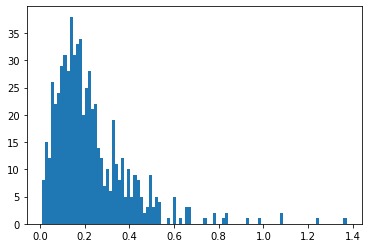

In [189]:
plt.hist(percentage_difference_n, bins=100)

In [190]:
count_zero

497

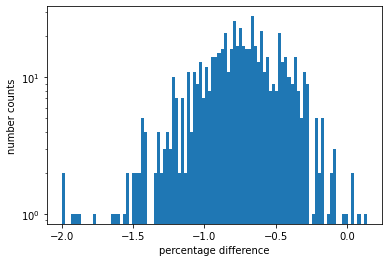

In [191]:
plt.hist(np.log10(percentage_difference_n), log=True, bins=100)
plt.xlabel("percentage difference")
plt.ylabel("number counts")
plt.savefig("a_figure1.png")